In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('../data/EDA_dataset.csv')
df_2001 = df[(df['year'] == 2001 )]
df_2008 = df[(df['year'] == 2008 )]

In [3]:
df_outliers = df[(df['delta_percap'] > 2) | (df['delta_percap'] < -2)]

In [4]:
df_outliers

,Unnamed: 0,area_fips,State,Region,gov_party,legis_party,fiscal,Area Title,population,10,...,517210,517911,517919,51913,519130,541711,541712,561311,561312,delta_percap
267,267,8047,Colorado,Rocky Mountain,R,S,5694.0,Gilpin County-- Colorado,4781,5449.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.046015
299,299,8111,Colorado,Rocky Mountain,R,S,5694.0,San Juan County-- Colorado,581,333.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.043029
1488,1488,28143,Mississippi,Southeast,D,D,3457.0,Tunica County-- Mississippi,9416,17761.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.686703
1650,1650,30069,Montana,Rocky Mountain,R,R,1270.0,Petroleum County-- Montana,490,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.775000
1675,1675,31005,Nebraska,Plains,R,N,2479.0,Arthur County-- Nebraska,423,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.165485
1676,1676,31007,Nebraska,Plains,R,N,2479.0,Banner County-- Nebraska,808,129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.151300
1677,1677,31009,Nebraska,Plains,R,N,2479.0,Blaine County-- Nebraska,564,216.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764628
1710,1710,31075,Nebraska,Plains,R,N,2479.0,Grant County-- Nebraska,743,222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.033311
1729,1729,31113,Nebraska,Plains,R,N,2479.0,Logan County-- Nebraska,780,174.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.114744
1730,1730,31115,Nebraska,Plains,R,N,2479.0,Loup County-- Nebraska,715,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.602797


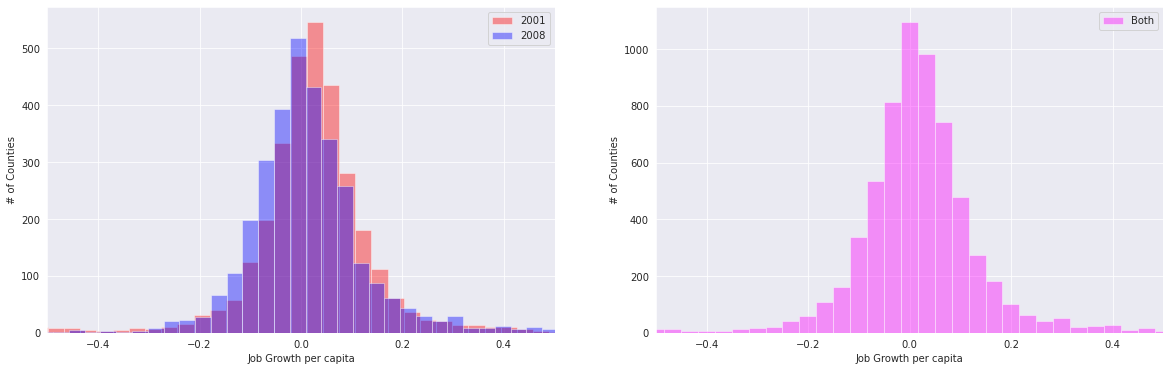

In [33]:
fig, ax = plt.subplots(1,2, figsize = (20, 6))
sns.set_style("darkgrid")
for v in [[df_2001, 'red', '2001'], [df_2008, 'blue', '2008']]:
    ax[0] = sns.distplot(v[0]['delta_percap'], norm_hist = False, bins = 1000, 
                         kde = False, color = v[1], label = v[2], ax = ax[0])
ax[0].set_xlim(-0.5, 0.5)
ax[0].set_xlabel('Job Growth per capita')
ax[0].set_ylabel('# of Counties')
ax[1] = sns.distplot(df['delta_percap'], norm_hist = False, bins = 1000, kde = False, color = 'magenta', label = 'Both')
ax[1].set_xlim(-0.5, 0.5)
ax[1].set_xlabel('Job Growth per capita')
ax[1].set_ylabel('# of Counties')
ax[0].legend()
ax[1].legend()
plt.show();

No handles with labels found to put in legend.


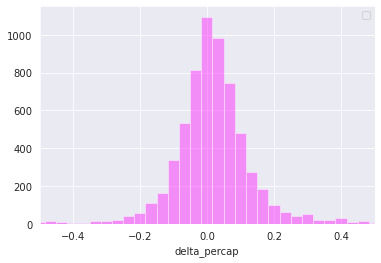

In [9]:
fig, ax = plt.subplots()

ax.set_xlim(-0.5, 0.5)
plt.legend()
plt.show();

In [10]:
for column in [df_2001['delta_percap'], df_2008['delta_percap'], df_2001['recovery'], df_2008['recovery'], df['recovery'], df['delta_percap']]:
    print(column.describe())
    print(column.value_counts())

count    3264.000000
mean        0.045563
std         0.580575
min        -3.686703
25%        -0.031694
50%         0.022488
75%         0.078462
max        28.193182
Name: delta_percap, dtype: float64
 0.000000    2
 0.025641    2
-0.003639    1
 0.013921    1
-0.065437    1
            ..
-0.544933    1
 0.077782    1
 0.084459    1
 0.041547    1
 1.187500    1
Name: delta_percap, Length: 3262, dtype: int64
count    3257.000000
mean        0.057641
std         0.617069
min        -1.421265
25%        -0.049982
50%         0.005295
75%         0.068364
max        29.672131
Name: delta_percap, dtype: float64
 0.000000    3
 0.035344    1
-0.026934    1
-0.023674    1
 0.060609    1
            ..
-0.069010    1
-0.089817    1
-0.001488    1
-0.285055    1
 0.000416    1
Name: delta_percap, Length: 3255, dtype: int64
count     3264
unique       2
top       True
freq      2022
Name: recovery, dtype: object
True     2022
False    1242
Name: recovery, dtype: int64
count     3257
unique  

In [63]:
df = df.reset_index()

AttributeError: 'list' object has no attribute 'reset_index'

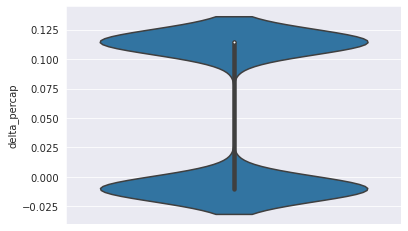

In [75]:
fig, ax = plt.subplots()
sns.violinplot(y=df['year'], hue=None, data=df['delta_percap'], order=None, 
                   hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, 
                   gridsize=100, width=0.8, inner='box', split=False, dodge=True, 
                   orient=None, linewidth=None, color=None, palette=None, 
                   saturation=0.75, ax=ax)
ax.set_xlim(-0.5, 0.5)
plt.show()


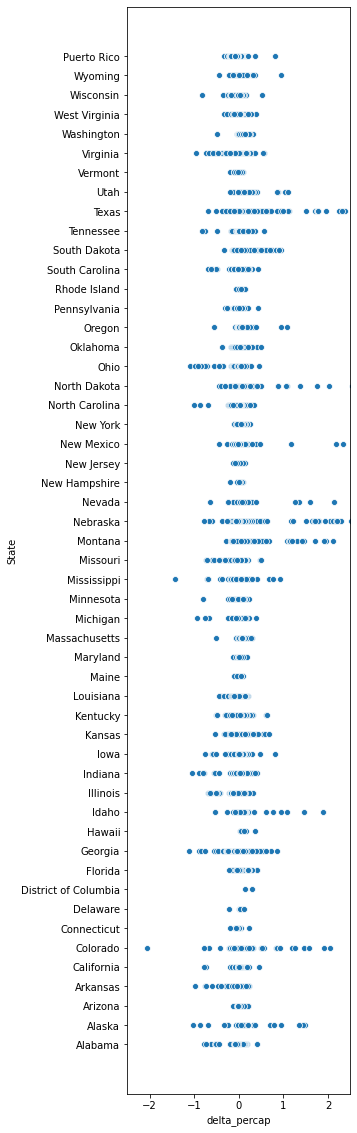

In [20]:
fig, ax = plt.subplots(figsize = (4,20))
ax = sns.scatterplot(df['delta_percap'], df['State'])
ax.set_xlim(-2.5,2.5)
plt.show();
